## Analysis on Heart Attack Report

## Introduction

According to the NY Department of Health, [1 in every 5 people die from heart disease](https://www.health.ny.gov/diseases/cardiovascular/heart_disease/#:~:text=About%20695%2C000%20people%20die%20of,killing%20approximately%20375%2C476%20people%20annually). Heart disease is a major concern to billions of people worldwide, But its casualties and consequences can be mitigated much more effectively when discovered early. This is why it'll be beneficial to be able to predict the status of heart disease in an individual using related factors. 
We will use the [provided dataset](https://archive.ics.uci.edu/dataset/45/heart+disease) involving 76 attributes of medical test data from Hungary, Switzerland, VA Long Beach, and Cleveland, using the latter in which we will obtain the data and investigate from. We decided to use the Cleveland database as it contains the largest amount of observations and 14 relevant attributes. We aim to use classification modelling with this data to study its relationship with heart disease using a few distinct variables. We can generalize our objective with a single question: 
Is it possible to predict an individual's chances of developing heart disease using only their prior medical test data?


## Methods and Results

The following includes our data exploration and model building. 

Here are the definitions of necessary terms proceeding this point:

**cp** (type of chest pain: typical angina, atypical angina, non-anginal pain, asymptomatic) 

**age** (in years) 

**sex** (biological sex: female/male)

**chol** (serum cholesterol) 

**thalach** (max heart rate achieved) 

**restecg** (resting electrocardiographic results)

**num** (diagnosis of heart disease)

### Preliminary Exploratory Data Analysis

**Importing the Libraries Needed for the Project**

In [320]:
# install and import packages
#install.packages(c("languageserver", "repr", "tidymodels", "RColorBrewer"))
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
install.packages("kknn")

Warning message:
"package 'kknn' is in use and will not be installed"


**Downloading and Reading the <a href="https://archive.ics.uci.edu/dataset/45/heart+disease">Data</a>**

In [321]:
url <- "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"
dest <- "data/file.zip"

# checks if the data file exists
if (!dir.exists("data/")) {
  #creates the file if it doesn't exist
  dir.create("data/", recursive = TRUE)
}

# downloads the file from the url to data file
download.file(url, dest)

# unzips the file
unzip(zipfile = dest,
      files = "processed.cleveland.data",
      exdir = "data/")

# added column names to the data
cleveland_data_col_names <- c("age",
                              "sex",
                              "cp",
                              "trestbps",
                              "chol", "fbs",
                              "restecg", "thalach",
                              "exang",
                              "oldpeak",
                              "slope",
                              "ca",
                              "thal",
                              "num")

# reading the data by csv

cleveland_data <- read_csv("data/processed.cleveland.data",
                           col_names = cleveland_data_col_names)

head(cleveland_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


Table 1: Values of the data frame

### Describing The Data

**Available Features in the Dataset**

In [322]:
# taking a look at the features in the dataset
print(cleveland_data_col_names)

 [1] "age"      "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "num"     


**What Type of Data is in the Dataset**

In [323]:
# taking a look at the data patterns
glimpse(cleveland_data)

Rows: 303
Columns: 14
$ age      <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, 52, 5…
$ sex      <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1…
$ cp       <dbl> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, 3, 2, 1…
$ trestbps <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 1…
$ chol     <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 2…
$ fbs      <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0…
$ restecg  <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2…
$ thalach  <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 1…
$ exang    <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1…
$ oldpeak  <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, 0…
$ slope    <dbl> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2…
$ ca       <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0", "0.0", "1.0"…
$ thal     <chr> "

**Unique Values in Each Column**
- We found that the columns: `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, and `num` should be represented as categorical variables.

In [324]:
# Get all the unique values per column
cleveland_unique <- lapply(cleveland_data, unique)

# counts the number of different uniques per column
unique_counts <- sapply(cleveland_unique, length)

# only keep the columns where theres less than 10 uniques
cleveland_unique <- cleveland_unique[unique_counts < 10]

print(cleveland_unique)

$sex
[1] 1 0

$cp
[1] 1 4 3 2

$fbs
[1] 1 0

$restecg
[1] 2 0 1

$exang
[1] 0 1

$slope
[1] 3 2 1

$ca
[1] "0.0" "3.0" "2.0" "1.0" "?"  

$thal
[1] "6.0" "3.0" "7.0" "?"  

$num
[1] 0 2 1 3 4



### Data Transformation

**Transforming `ca` and `thal` Columns Into dbl Type**

In [325]:
cleveland_data <- cleveland_data |>
  mutate(ca = as.numeric(ca),
         thal = as.numeric(thal))
head(cleveland_data)

Warning message:
"There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning."


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


Table 2: Values for mutated data frame

**Checking for Rows Containing NA or "?"**

- We found below that the column `ca` and `thal` contains nulls.

In [326]:
# making a tibble with column type and the number of nulls in each column
cleveland_summary <- tibble(
  ColumnName = cleveland_data_col_names,
  NumNulls = map_dbl(cleveland_data, ~sum(.x == "?", na.rm = TRUE)),
  NumNAs = map_dbl(cleveland_data, ~sum(is.na(.x))),
  TotalMissing = map_dbl(cleveland_data,
                         ~sum(.x == "?", na.rm = TRUE) + sum(is.na(.x))),
  ColumnType = map_chr(cleveland_data, ~class(.x))
)
cleveland_summary

ColumnName,NumNulls,NumNAs,TotalMissing,ColumnType
<chr>,<dbl>,<dbl>,<dbl>,<chr>
age,0,0,0,numeric
sex,0,0,0,numeric
cp,0,0,0,numeric
trestbps,0,0,0,numeric
chol,0,0,0,numeric
fbs,0,0,0,numeric
restecg,0,0,0,numeric
thalach,0,0,0,numeric
exang,0,0,0,numeric


Table 3: Number of nulls and NA for data frame

**Removing Rows Containing NA or "?"**

In [327]:
cleveland_filtered <- cleveland_data %>%
  filter(!if_any(everything(), is.na))

# making a tibble with column type and the number of nulls
# in each column to make sure Na is removed
cleveland_summary <- tibble(
  ColumnName = cleveland_data_col_names,
  NumNulls = map_dbl(cleveland_filtered, ~sum(.x == "?", na.rm = TRUE)),
  NumNAs = map_dbl(cleveland_filtered, ~sum(is.na(.x))),
  TotalMissing = map_dbl(cleveland_filtered,
                         ~sum(.x == "?", na.rm = TRUE) + sum(is.na(.x))),
  ColumnType = map_chr(cleveland_filtered, ~class(.x))
)
cleveland_summary

ColumnName,NumNulls,NumNAs,TotalMissing,ColumnType
<chr>,<dbl>,<dbl>,<dbl>,<chr>
age,0,0,0,numeric
sex,0,0,0,numeric
cp,0,0,0,numeric
trestbps,0,0,0,numeric
chol,0,0,0,numeric
fbs,0,0,0,numeric
restecg,0,0,0,numeric
thalach,0,0,0,numeric
exang,0,0,0,numeric


Table 4: Number of nulls and NA for data frame

**Transforming the `num` Column Into 0 and 1**
- Since `num` is what we are trying to predict, we want to have it in a categorical format.
- In `num`, any number greater than 0 represents diagnosis of coronary artery disease

In [328]:
# turn num into either 0 or 1
cleveland_filtered <- cleveland_filtered |>
  mutate(num = ifelse(num > 0, 1, 0))

print(unique(cleveland_filtered$num))

[1] 0 1


**Turning `num` Into a Factor**
- **Positive** for when num > 0
- **Negative** for when num = 0

In [329]:
# using num as a factor and renaming the categories
cleveland_filtered <- cleveland_filtered |>
  mutate(num = as_factor(num)) |>
  mutate(num = fct_recode(num, "Positive" = "1", "Negative" = "0"))

head(cleveland_filtered)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,Negative
67,1,4,160,286,0,2,108,1,1.5,2,3,3,Positive
67,1,4,120,229,0,2,129,1,2.6,2,2,7,Positive
37,1,3,130,250,0,0,187,0,3.5,3,0,3,Negative
41,0,2,130,204,0,2,172,0,1.4,1,0,3,Negative
56,1,2,120,236,0,0,178,0,0.8,1,0,3,Negative


Table 5: Data frame with mutated `num`

#### Splitting Data

- Before we start with the feature selection, we will split the data into train test splits to avoid breaking the golden rule.
- This ensures that the feature selection is influenced only by the training data.

In [330]:
set.seed(1111)

# creating the split object
cleveland_split <- initial_split(cleveland_filtered, prop = 0.8, strata = num)

# creating the training split
cleveland_train <- training(cleveland_split)

# creating the testing split
cleveland_test <- testing(cleveland_split)

head(cleveland_train)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,Negative
37,1,3,130,250,0,0,187,0,3.5,3,0,3,Negative
56,1,2,120,236,0,0,178,0,0.8,1,0,3,Negative
57,1,4,140,192,0,0,148,0,0.4,2,0,6,Negative
56,0,2,140,294,0,2,153,0,1.3,2,0,3,Negative
44,1,2,120,263,0,0,173,0,0.0,1,0,7,Negative


Table 6: Values for train split 

**Imbalance Checking**
- Although there are more cases of negative, this is not considered class imbalance as the overall amount is similar.
- The ratio of negative cases to positive cases is 1:1.17 as calculated.

Negative count: 128 
Positive count: 109 
Ratio of Negative to Positive 1:1.17

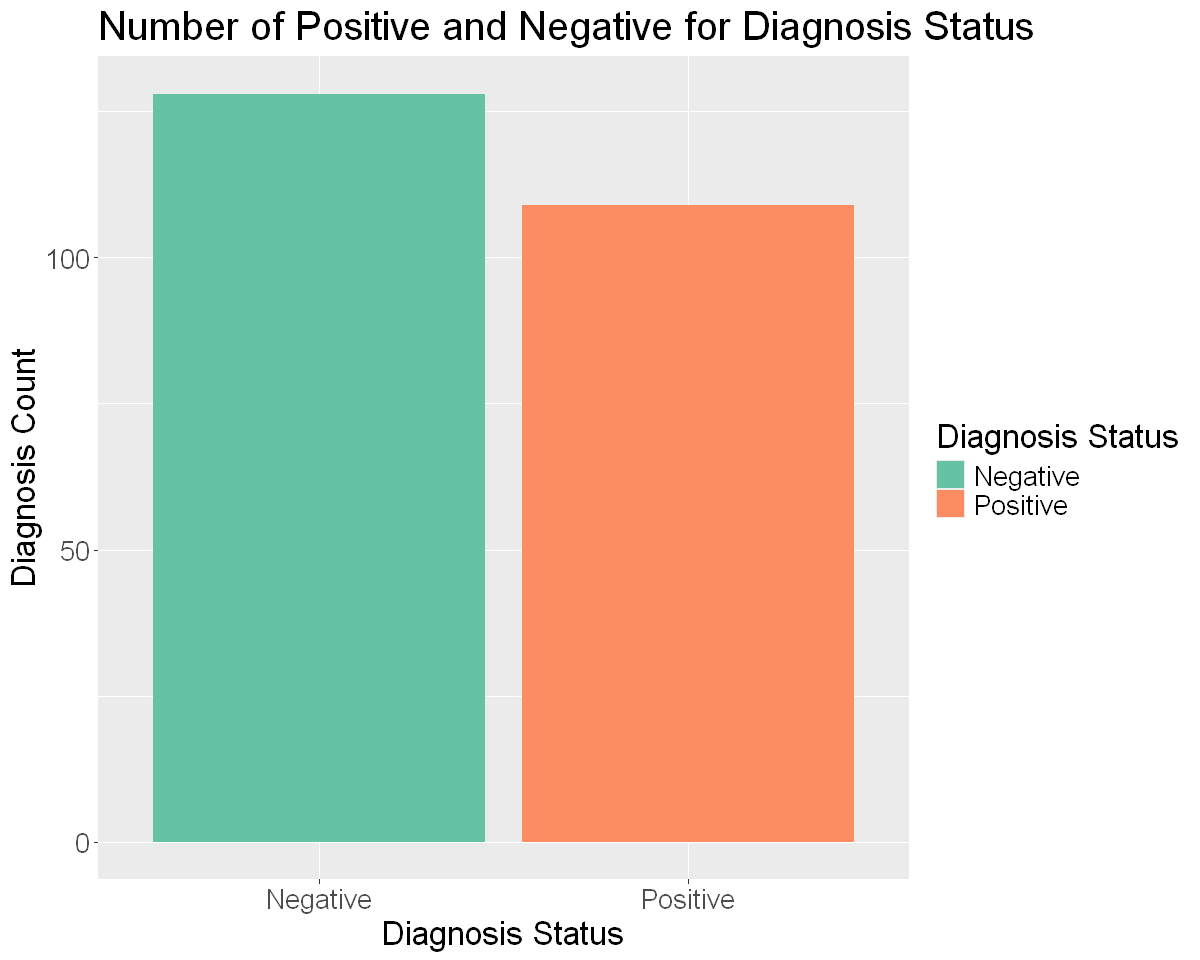

In [331]:
options(repr.plot.width = 10, repr.plot.height = 8)

# number of data points for each diagnosis status
status_dist <- cleveland_train |>
  ggplot(aes(x = num, fill = num)) +
  geom_bar(position = "identity") +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Number of Positive and Negative for Diagnosis Status",
       x = "Diagnosis Status",
       y = "Diagnosis Count",
       fill = "Diagnosis Status") +
  theme(text = element_text(size = 20))

status_dist

negative_count <- cleveland_train |>
  select(num) |>
  filter(num == "Negative") |>
  nrow()

positive_count <- cleveland_train |>
  select(num) |>
  filter(num == "Positive") |>
  nrow()

ratio <- (negative_count / positive_count)

cat(sprintf("Negative count: %d \nPositive count: %d \nRatio of Negative to Positive 1:%.2f",negative_count, positive_count, ratio))

Figure 1: Number of Positive and Negative for Diagnosis Status

### Feature Selection
K-NN is an algorithm that does not work well with many predictors. To choose the predictors used for K-NN, we will graph the variables against the classifier to see the relationship.

#### `age` (Age of Patients)
- From the boxplot below, we see that the people who were diagnosed positive have a higher age. This can be a good predictor.

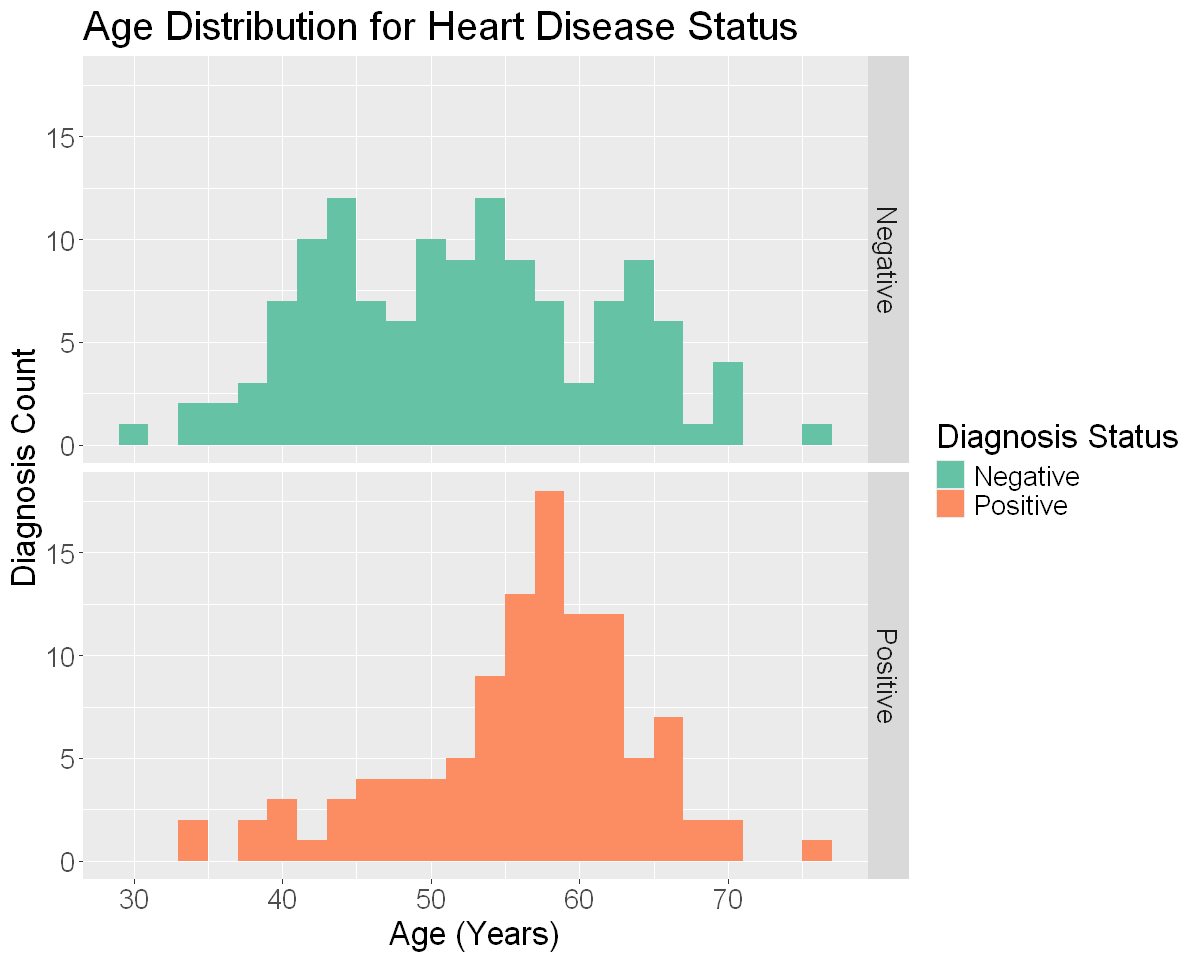

In [332]:
options(repr.plot.width = 10, repr.plot.height = 8)

# graph to compare the age and diagnosis count for diagnosis type
age_dist <- cleveland_train |>
  ggplot(aes(x = age, fill = num)) +
  geom_histogram(position = "identity", binwidth = 2) +
  scale_fill_brewer(palette = "Set2") +
  facet_grid(rows = vars(num)) +
  labs(title = "Age Distribution for Heart Disease Status",
       x = "Age (Years)",
       y = "Diagnosis Count",
       fill = "Diagnosis Status") +
  theme(text = element_text(size = 20))

age_dist

Figure 2: Age Distribution for Heart Disease Status

$Negative
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.00   44.75   52.00   52.48   59.00   76.00 

$Positive
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  35.00   53.00   58.00   56.72   62.00   77.00 


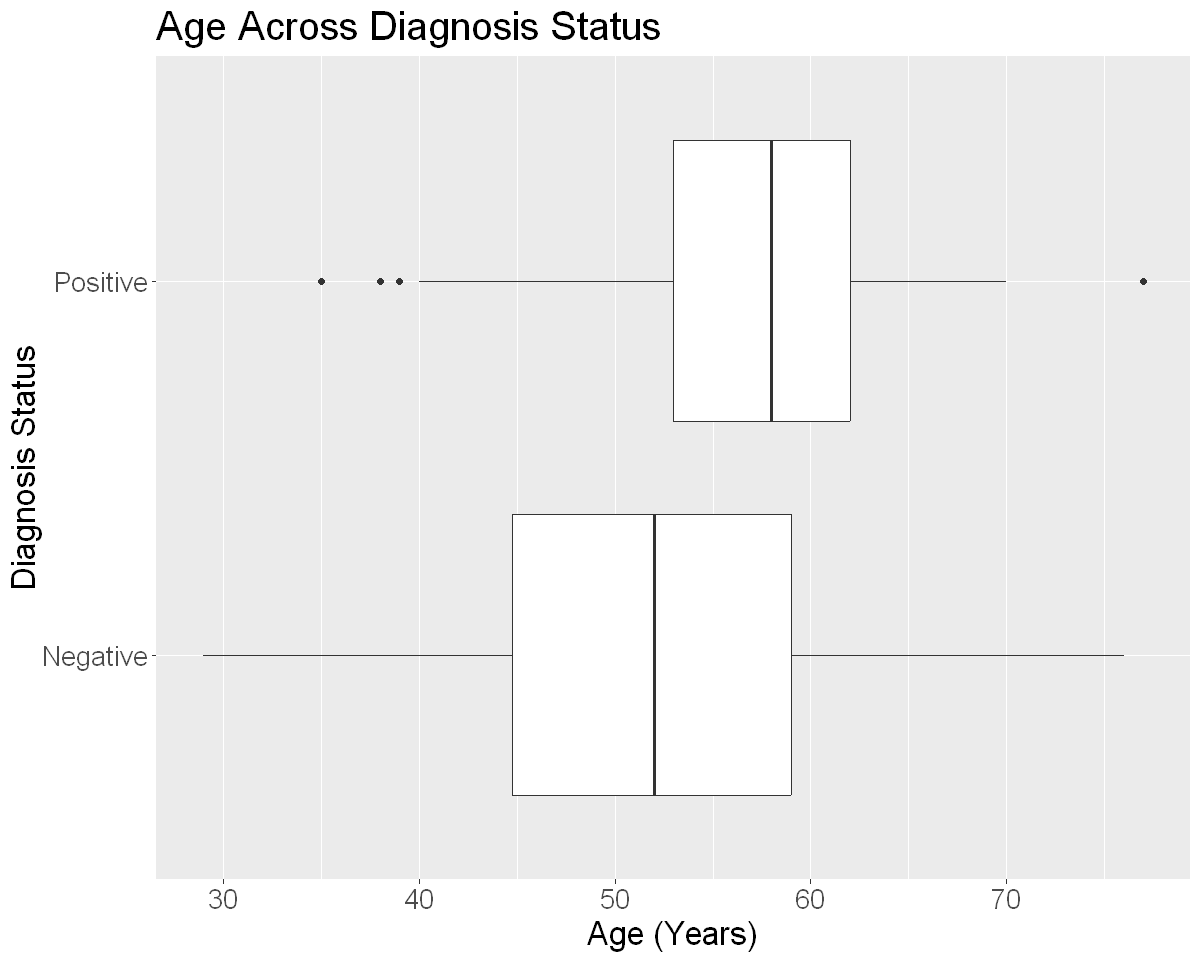

In [333]:
# boxplot for chol
age_box <- cleveland_train |>
  ggplot(aes(y = num, x = age)) +
  geom_boxplot() +
  labs(title = "Age Across Diagnosis Status",
       x = "Age (Years)",
       y = "Diagnosis Status",
       color = "Diagnosis Status") +
  theme(text = element_text(size = 20))

age_box

age_summary <- list(
  Negative = summary(cleveland_train$age[cleveland_train$num == "Negative"]),
  Positive = summary(cleveland_train$age[cleveland_train$num == "Positive"])
)

age_summary

Figure 3: Age Across Diagnosis Status

#### `sex` (Sex of Patients)
- From the graph, there seems to be much more female who is negatively diagnosed. We will use this as a predictor

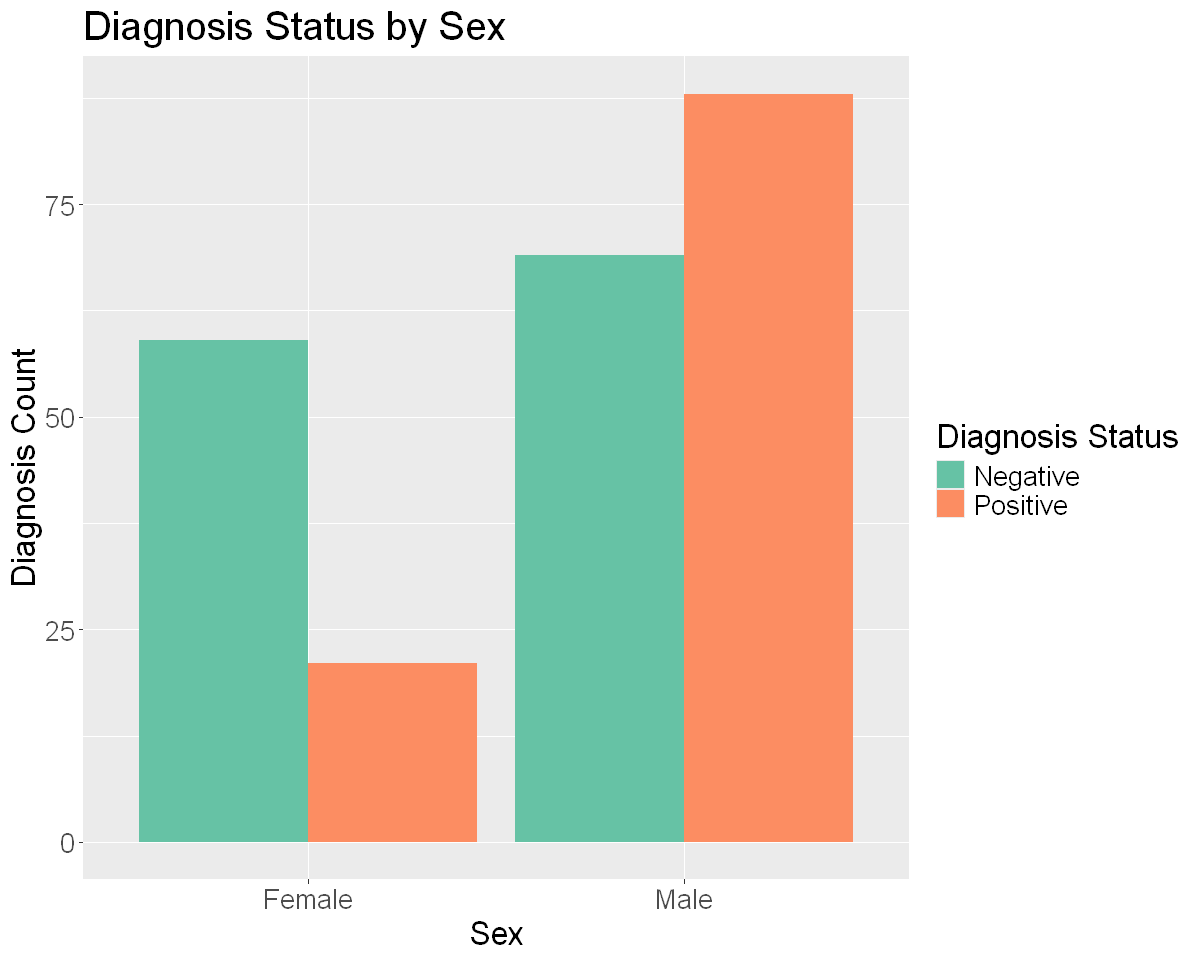

In [334]:
# graph to compare the sex and diagnosis count
gender_dist <- cleveland_train |>
  mutate(sex = as_factor(sex)) |>
  mutate(sex = fct_recode(sex, "Male" = "1", "Female" = "0")) |>
  ggplot(aes(x = as_factor(sex), fill = num)) +
  geom_bar(position = "dodge") +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Diagnosis Status by Sex",
       x = "Sex",
       y = "Diagnosis Count",
       fill = "Diagnosis Status") +
  theme(text = element_text(size = 20))

gender_dist

Figure 4: Diagnosis Status by Sex

#### `cp` (Chest Pain Type)
- Evident from the plots below, each category of chest pain seems to associate strongly with either the positive or negative diagnosis status. This makes `cp` ideal for predicting.

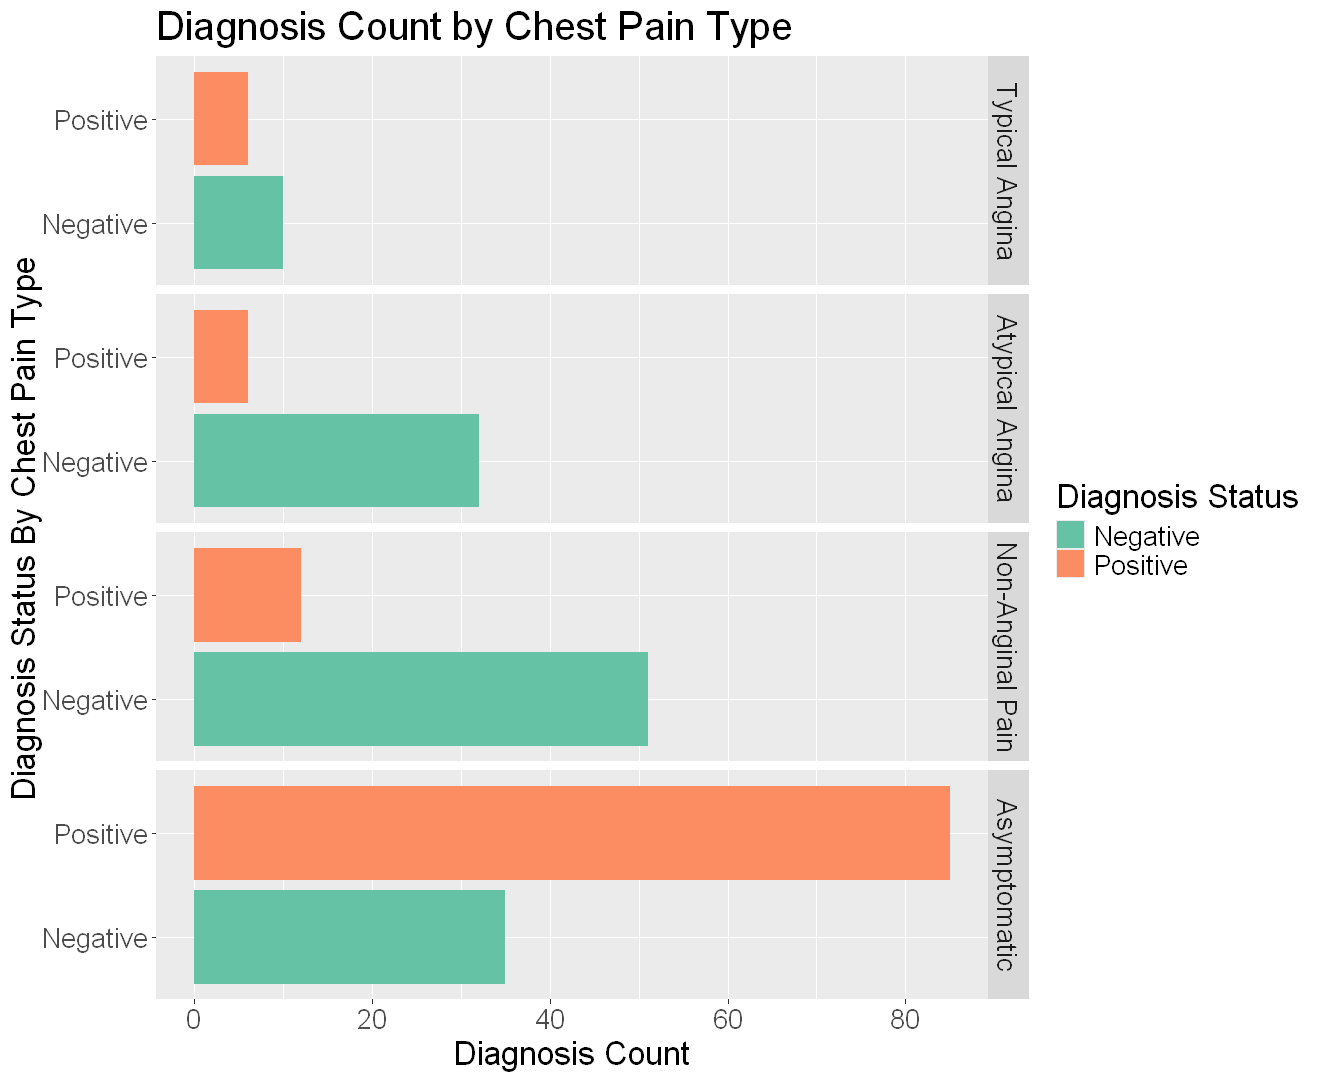

In [335]:
options(repr.plot.width = 11, repr.plot.height = 9)
# graph to compare the cp and diagnosis count
cp_dist <- cleveland_train |>
  mutate(cp = factor(cp, levels = c(1, 2, 3, 4),
                     labels = c("Typical Angina",
                                "Atypical Angina",
                                "Non-Anginal Pain",
                                "Asymptomatic"))) |>
  ggplot(aes(y = num, fill = num)) +
  geom_bar(position = "dodge") +
  facet_grid(rows = vars(cp)) +
  labs(title = "Diagnosis Count by Chest Pain Type",
       x = "Diagnosis Count",
       y = "Diagnosis Status By Chest Pain Type",
       fill = "Diagnosis Status") +
  scale_fill_brewer(palette = "Set2") +
  theme(text = element_text(size = 20))

cp_dist



Figure 5: Diagnosis Count by Chest Pain Type

#### `trestbps` (Resting Blood Pressure)
- The plots below shown below of `trestbps`(resting blood pressure) have a lot of overlap of data. This makes `trestbps` not an ideal predictor.

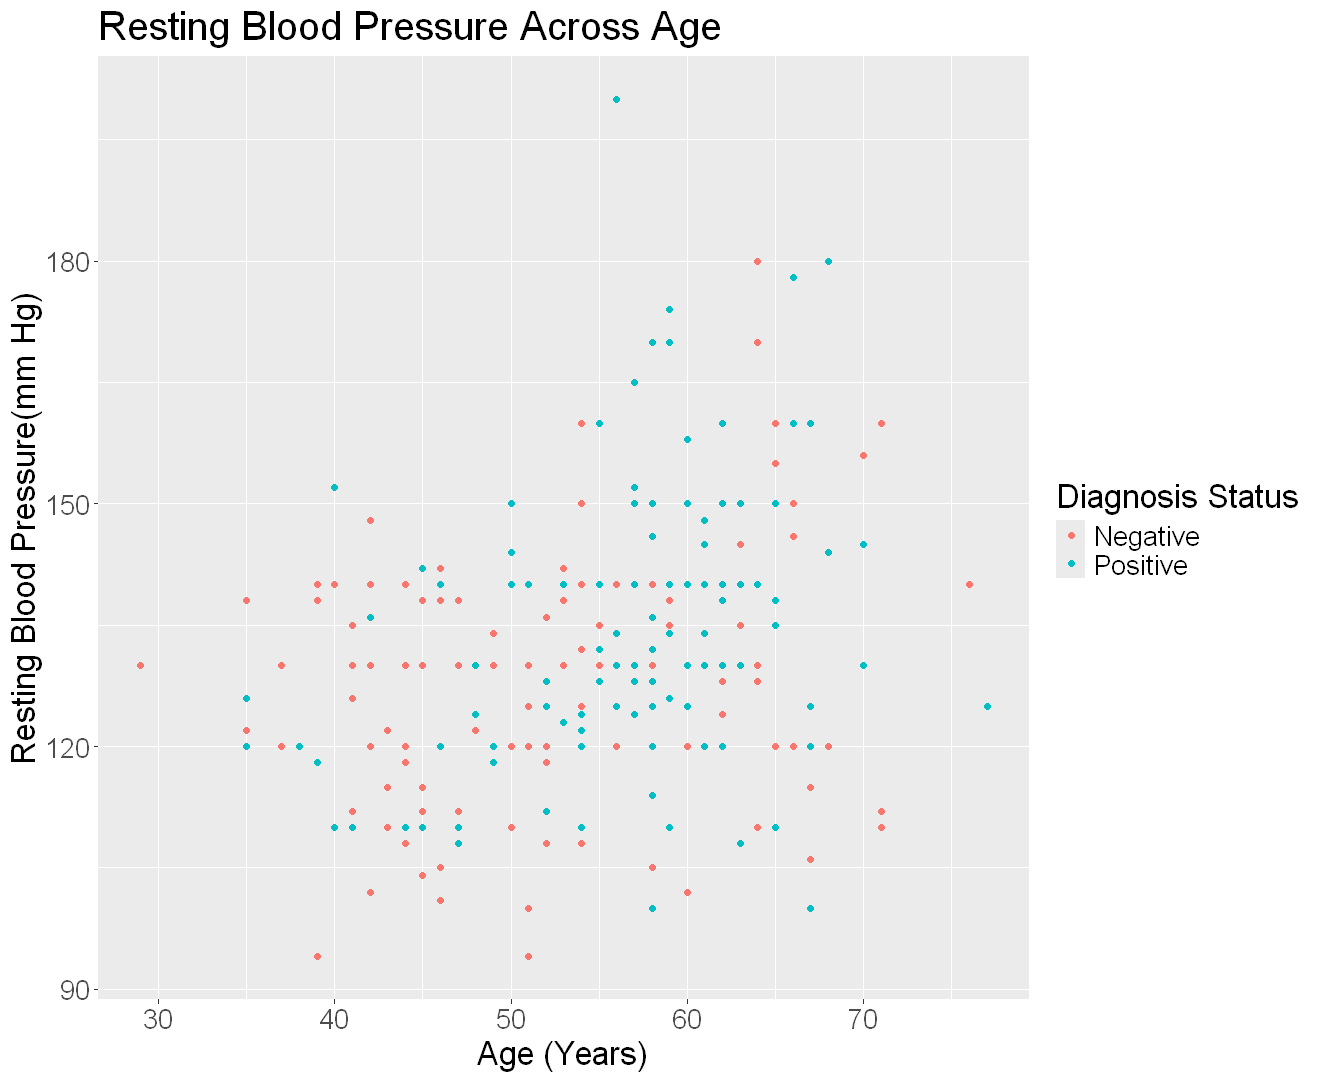

In [336]:
# scatter plot for trestbps against age
trestbps_vs_age <- cleveland_train |>
  ggplot(aes(x = age, y = trestbps, color = num)) +
  geom_point(position = "identity") +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Resting Blood Pressure Across Age",
       x = "Age (Years)",
       y = "Resting Blood Pressure(mm Hg)",
       color = "Diagnosis Status") +
  theme(text = element_text(size = 20))

trestbps_vs_age

Figure 6: Resting Blood Pressure Across Age

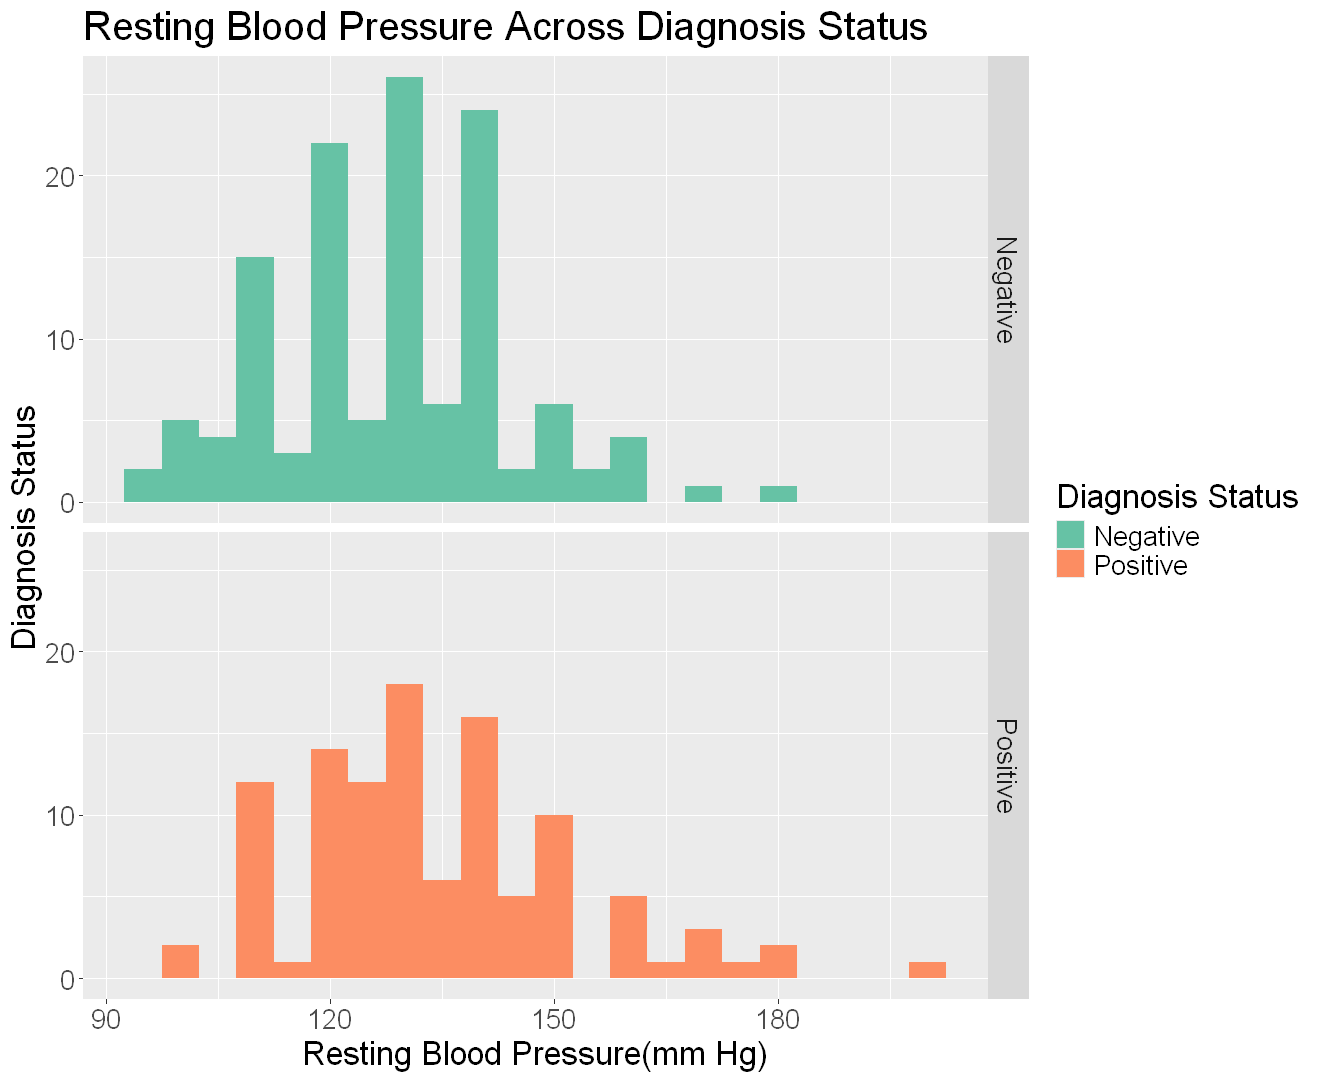

In [337]:
# histogram of trestbps for num
trestbps_hist <- cleveland_train |>
  ggplot(aes(x = trestbps, fill = num)) +
  geom_histogram(position = "identity", binwidth = 5) +
  scale_fill_brewer(palette = "Set2") +
  facet_grid(rows = vars(num)) +
  labs(title = "Resting Blood Pressure Across Diagnosis Status",
       x = "Resting Blood Pressure(mm Hg)",
       y = "Diagnosis Status",
       fill = "Diagnosis Status") +
  theme(text = element_text(size = 20))

trestbps_hist

Figure 7: Resting Blood Pressure Across Diagnosis Status

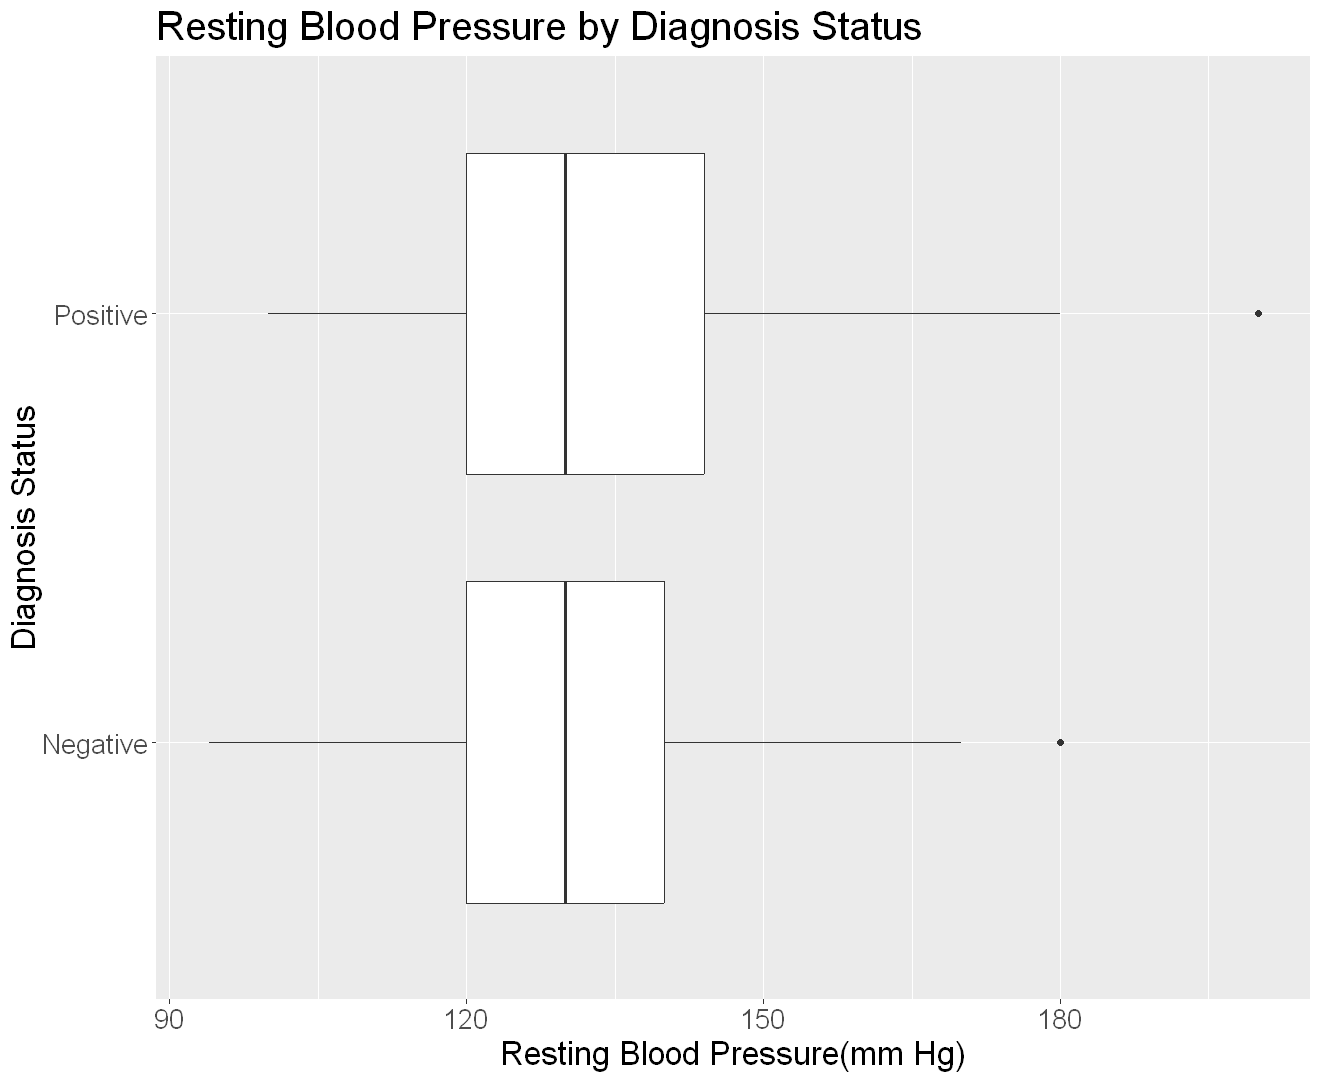

In [338]:
# boxplot for trestbps
trestbps_box <- cleveland_train |>
  ggplot(aes(y = num, x = trestbps)) +
  geom_boxplot() +
  labs(title = "Resting Blood Pressure by Diagnosis Status",
       x = "Resting Blood Pressure(mm Hg)",
       y = "Diagnosis Status",
       color = "Diagnosis Status") +
  theme(text = element_text(size = 20))

trestbps_box

Figure 8: Resting Blood Pressure by Diagnosis Status

#### `chol` (Serum Cholestrol)
- From the summary and plot below, the positive diagnosis has a higher chol median than the negative diagnosis. However, due to the overlap between the box plots, this is not a good predictor.

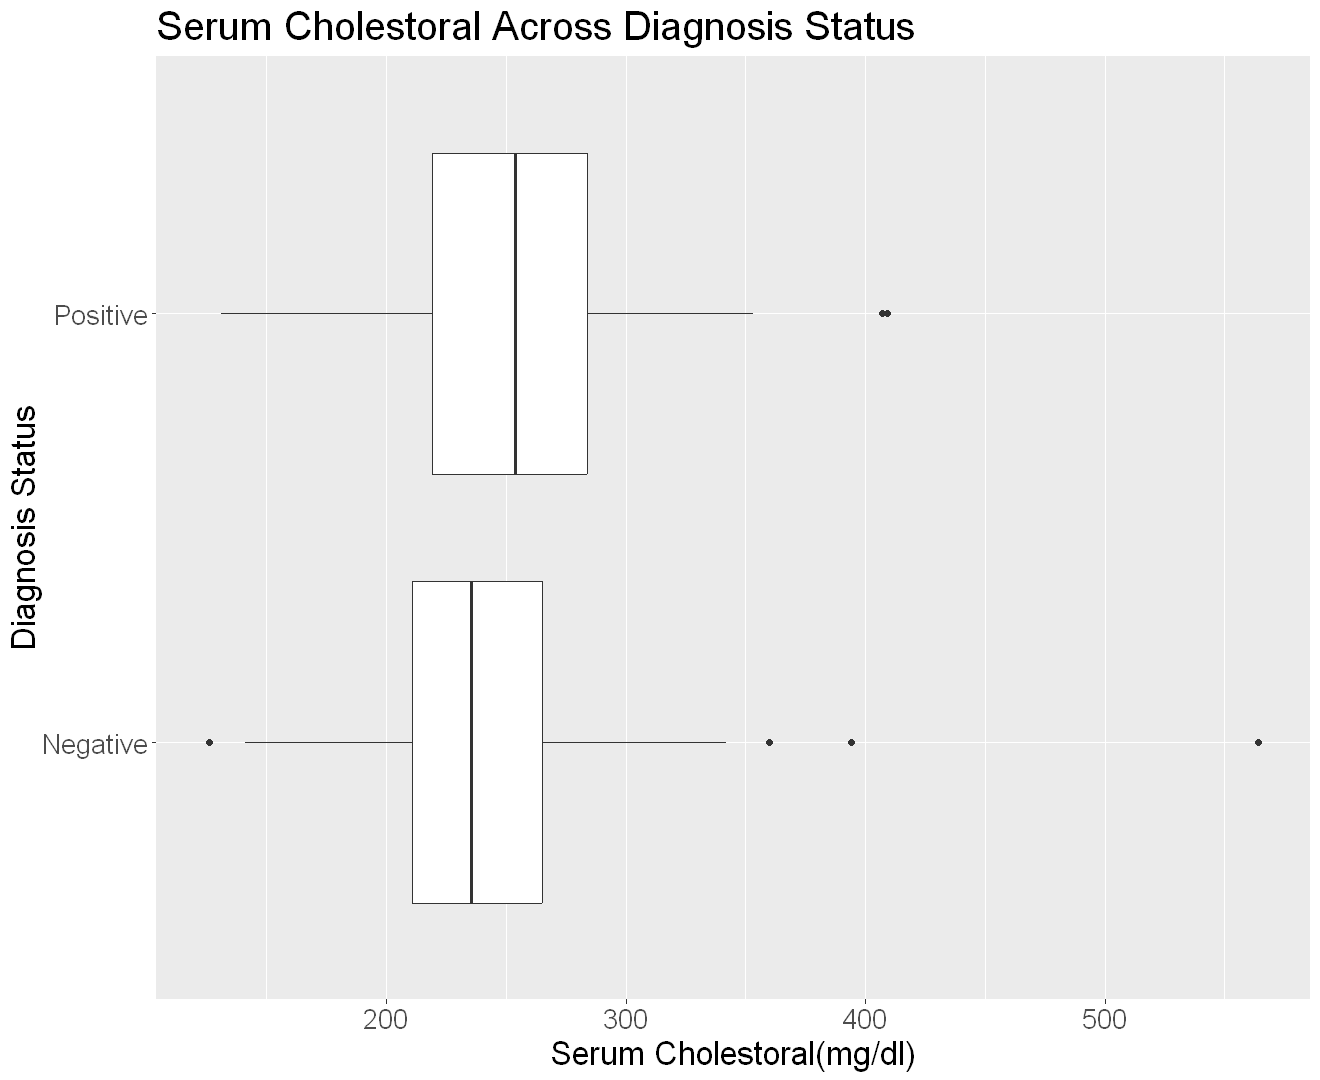

In [339]:
# boxplot for chol
chol_box <- cleveland_train |>
  ggplot(aes(y = num, x = chol)) +
  geom_boxplot() +
  labs(title = "Serum Cholestoral Across Diagnosis Status",
       x = "Serum Cholestoral(mg/dl)",
       y = "Diagnosis Status",
       color = "Diagnosis Status") +
  theme(text = element_text(size = 20))

chol_box

Figure 9: Serum Cholestrol Across Diagnosis Status

$Negative
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  126.0   211.0   235.5   242.6   265.0   564.0 

$Positive
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    131     219     254     253     284     409 


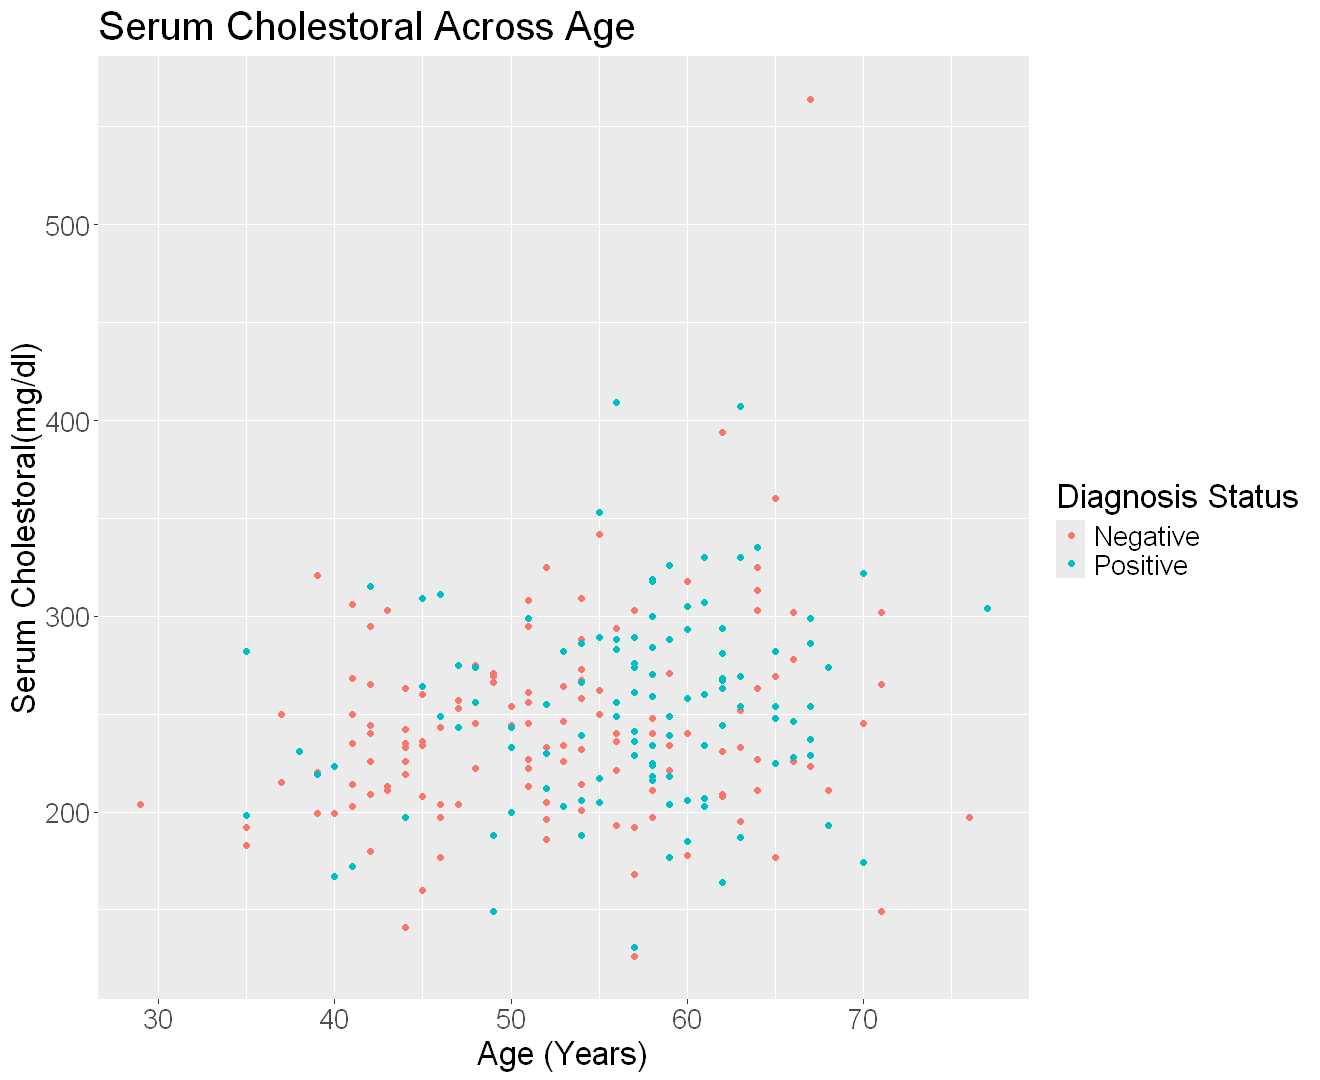

In [340]:
# checking the age against chol level
chol_vs_age <- cleveland_train |>
  ggplot(aes(x = age, y = chol, color = num)) +
  geom_point(position = "identity") +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Serum Cholestoral Across Age",
       x = "Age (Years)",
       y = "Serum Cholestoral(mg/dl)",
       color = "Diagnosis Status") +
  theme(text = element_text(size = 20))

chol_vs_age

chol_summary <- list(
  Negative = summary(cleveland_train$chol[cleveland_train$num == "Negative"]),
  Positive = summary(cleveland_train$chol[cleveland_train$num == "Positive"])
)

chol_summary

Figure 10: Serum Cholestrol Across Age

#### `thalach` (Maximum Heart Rate)
- From the plots below, the people diagnosed as positive have a notably higher maximum heart rate than the people diagnosed as negative. This is a good predictor.

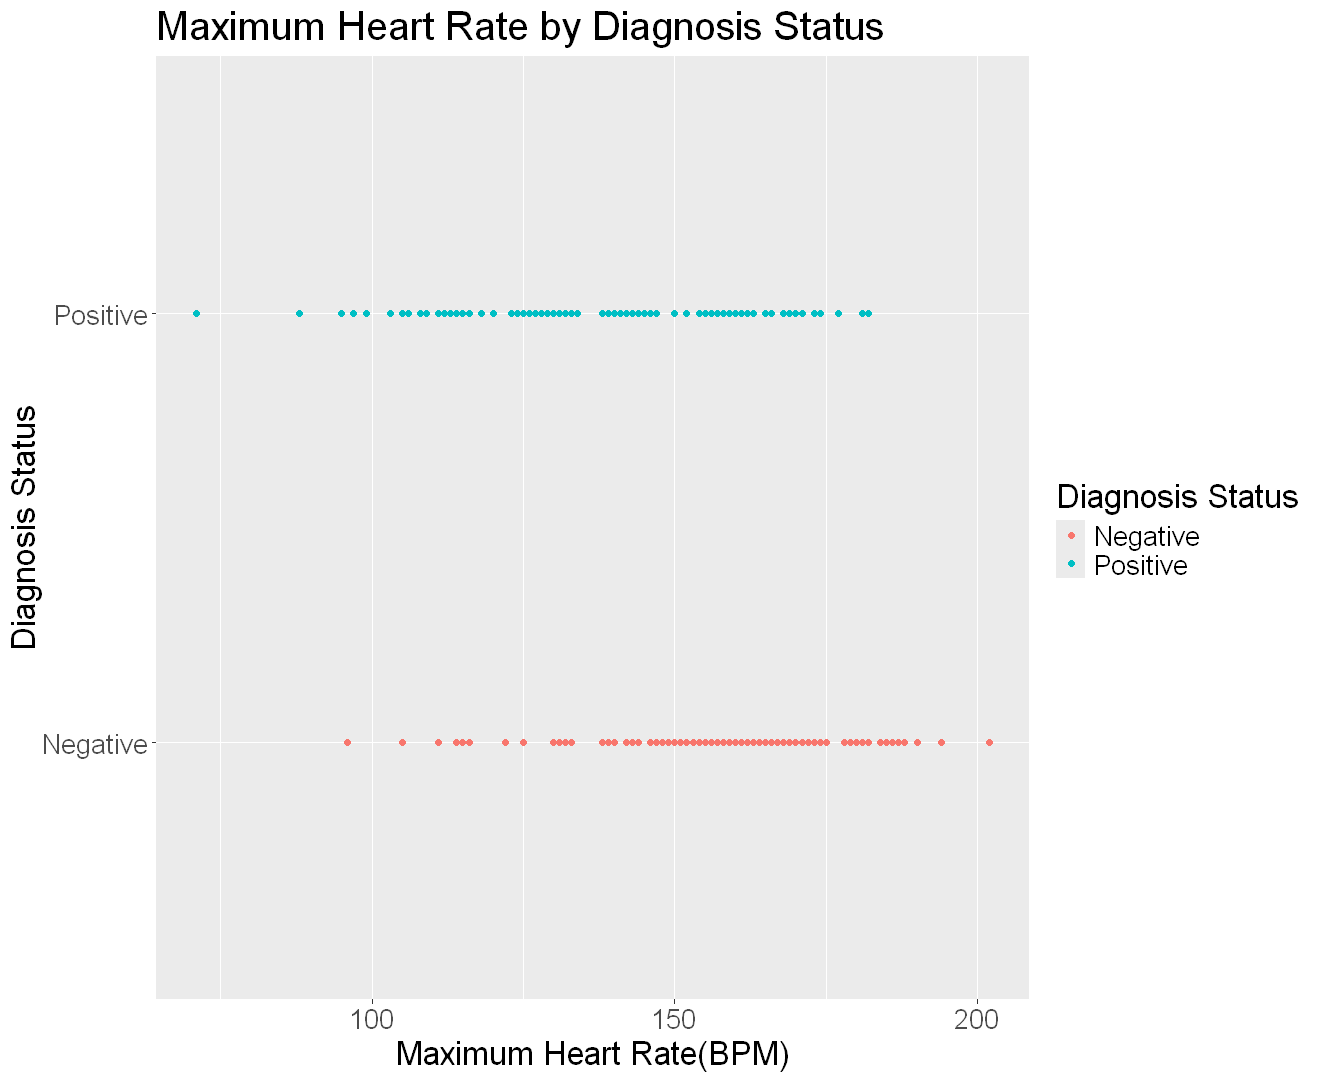

In [341]:
# scatter plot for thalach
thalach_dist <- cleveland_train |>
  ggplot(aes(y = num,
             x = thalach,
             color = num)) +
  geom_point() +
  labs(title = "Maximum Heart Rate by Diagnosis Status",
       x = "Maximum Heart Rate(BPM)",
       y = "Diagnosis Status",
       color = "Diagnosis Status") +
  scale_fill_brewer(palette = "Set2") +
  theme(text = element_text(size = 20))

thalach_dist

Figure 11: Maximum Heart Rate by Diagnosis Status

$Negative
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   96.0   148.0   160.0   158.3   172.2   202.0 

$Positive
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   71.0   125.0   142.0   139.6   158.0   182.0 


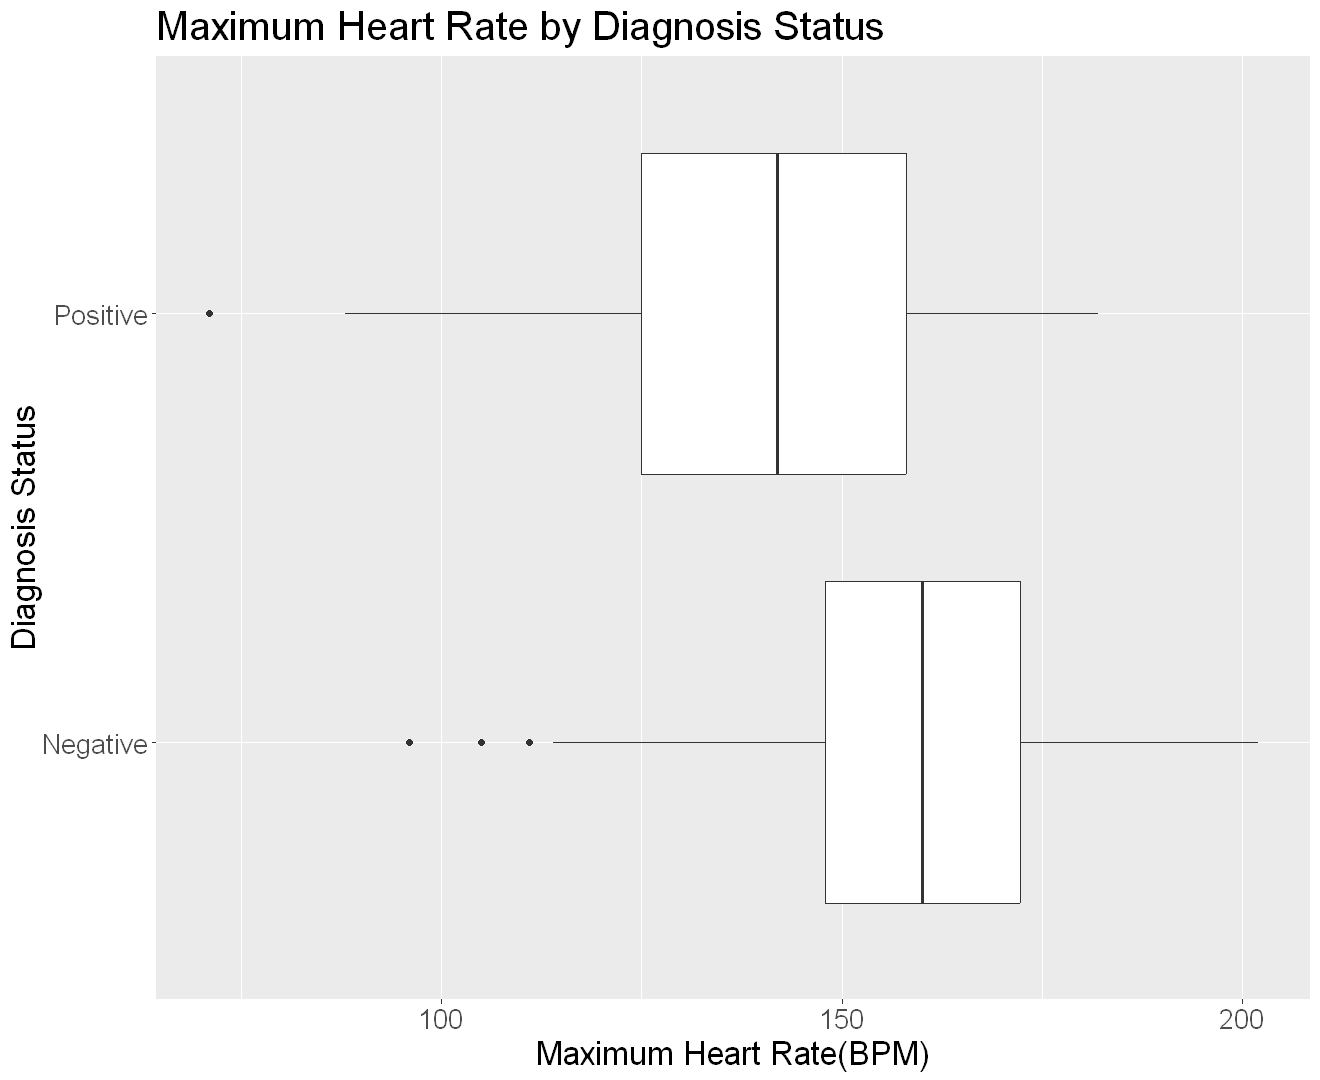

In [342]:
# boxplot for thalach
thalach_box <- cleveland_train |>
  ggplot(aes(y = num, x = thalach)) +
  geom_boxplot() +
  labs(title = "Maximum Heart Rate by Diagnosis Status",
       x = "Maximum Heart Rate(BPM)",
       y = "Diagnosis Status",
       color = "Diagnosis Status") +
  theme(text = element_text(size = 20))

thalach_box

thalach_summary <- list(
  Negative = summary(cleveland_train$thalach[cleveland_train$num == "Negative"]),
  Positive = summary(cleveland_train$thalach[cleveland_train$num == "Positive"])
)

thalach_summary

Figure 12: Maximum Heart Rate by Diagnosis Status

#### `restecg` (Resting Electrocardiographic Results)
- The plots below show alot of overlap between the bars. We will not be using this as a predictor.

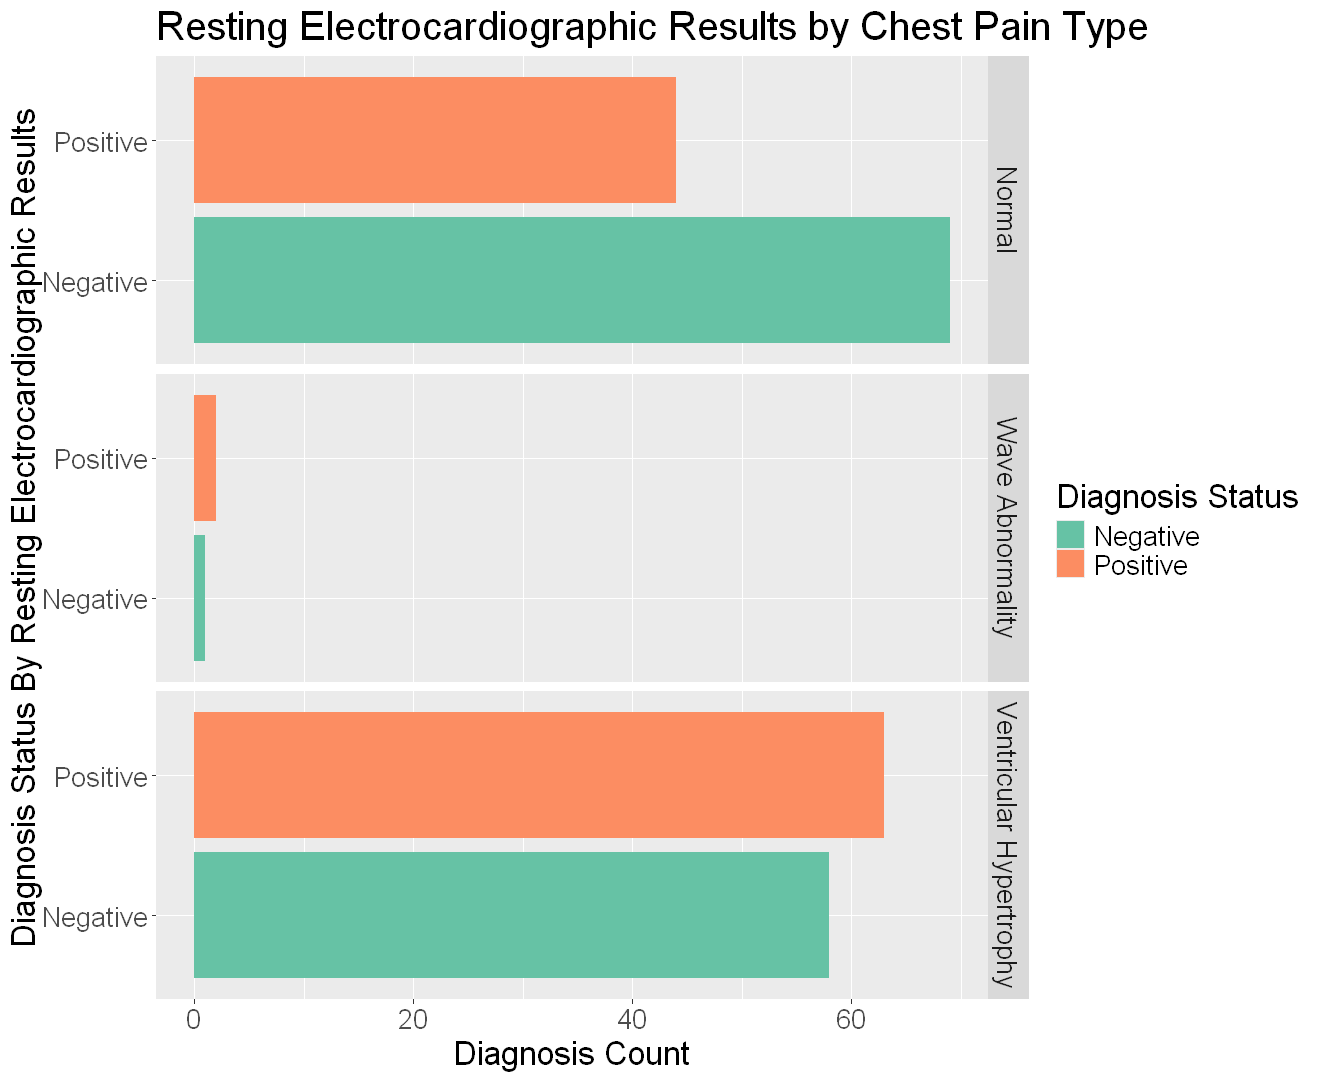

In [343]:
# graph to compare the cp and diagnosis count
restecg_dist <- cleveland_train |>
  mutate(restecg = factor(restecg, levels = c(0, 1, 2),
                          labels = c("Normal",
                                     "Wave Abnormality",
                                     "Ventricular Hypertrophy"))) |>
  ggplot(aes(y = num, fill = num)) +
  geom_bar(position = "dodge") +
  facet_grid(rows = vars(restecg)) +
  labs(title = "Resting Electrocardiographic Results by Chest Pain Type",
       x = "Diagnosis Count",
       y = "Diagnosis Status By Resting Electrocardiographic Results",
       fill = "Diagnosis Status") +
  scale_fill_brewer(palette = "Set2") +
  theme(text = element_text(size = 20))

restecg_dist


Figure 13: Resting Electrocardiographic Results by Chest Pain Type

### Model Tuning and Training

After visualizing the variables through the plots, we will use the variables: `age`, `sex`, `cp`, and `thalach` as our predictors. 

**Leaving Only the Predictor and Target Columns**

In [344]:
# selecting only the predictors and the target columns
cleveland_train <- cleveland_train |>
  select(age, sex, cp, thalach, num)

head(cleveland_train)

age,sex,cp,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,150,Negative
37,1,3,187,Negative
56,1,2,178,Negative
57,1,4,148,Negative
56,0,2,153,Negative
44,1,2,173,Negative


Table 7: Training split with only predictor and target column

**Scaling and Standardizing Data**

In [345]:
set.seed(1111)

# creating the recipe to scale and standardize with all predictors
knn_recipe <- recipe(num ~ ., data = cleveland_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 4



── Operations 



• Scaling for: all_predictors()

• Centering for: all_predictors()



**Tuning Model**

In [346]:
set.seed(1111)

# create a model for tuning
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# create a workflow with the recipe and tune model
knn_workflow <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_tune)

knn_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


**Tuning Model Cont.**

In [347]:
set.seed(1111)

# doing a 5 fold cross validation with num as the strata
cleveland_vfold <- vfold_cv(cleveland_train, v = 5, strata = num)

# creating a sequence from 1 to 20
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

# results based on k
knn_results <- knn_workflow |>
  tune_grid(resamples = cleveland_vfold, grid = k_vals) |>
  collect_metrics()

# getting the accuracy from the results
accuracies <- knn_results |>
  filter(.metric == "accuracy")

head(accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7003932,5,0.02027391,Preprocessor1_Model01
2,accuracy,binary,0.7003932,5,0.02027391,Preprocessor1_Model02
3,accuracy,binary,0.7129818,5,0.02622033,Preprocessor1_Model03
4,accuracy,binary,0.7129818,5,0.02622033,Preprocessor1_Model04
5,accuracy,binary,0.7168748,5,0.04060575,Preprocessor1_Model05
6,accuracy,binary,0.7168748,5,0.04060575,Preprocessor1_Model06


Table 8: Accuracies for the prediction

**Choosing K From Visualization**
- From the graph below, K = 14 seems to produce the highest cross validation accuracy estimate.

[1] 13

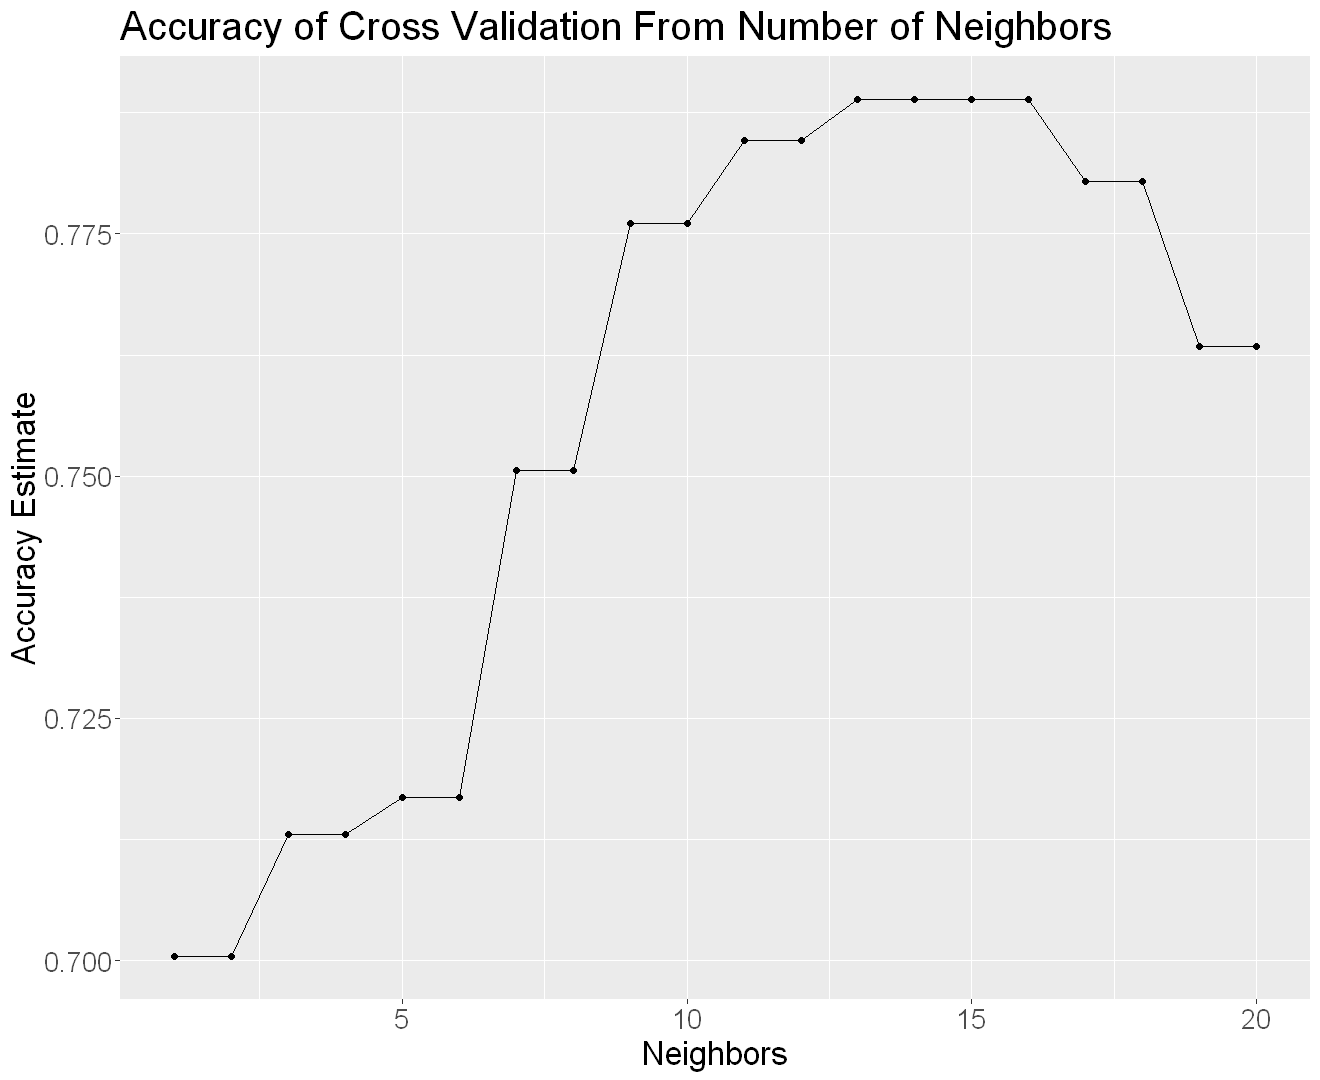

In [348]:
# line graph from the accuracies
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors",
       y = "Accuracy Estimate",
       title = "Accuracy of Cross Validation From Number of Neighbors") +
  theme(text = element_text(size = 20))

accuracy_vs_k

best_k <- accuracies |>
  arrange(desc(mean)) |>
  head(1) |>
  pull(neighbors)

best_k

Figure 14: Accuracy of Cross Validation From Number of Neighbors

**Creating the Model Based on Chosen K**

In [349]:
set.seed(1111)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 13) |>
  set_engine("kknn") |>
  set_mode("classification")

cleveland_workflow <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec)

cleveland_fit <- cleveland_workflow |>
  fit(cleveland_train)

cleveland_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(13,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2151899
Best kernel: rectangular
Best k: 13

### Evaluating the Model

**Evaluating Accuracy on the Test Set**

In [350]:
set.seed(1111)

cleveland_test_predictions <- predict(cleveland_fit, cleveland_test) |>
  bind_cols(cleveland_test)

cleveland_test_accuracy <- cleveland_test_predictions |>
  metrics(truth = num, estimate = .pred_class) |>
  filter(.metric == "accuracy")

cleveland_test_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7666667


Table 9: Accuracy of our model

**Checking for Positive Level**

In [351]:
cleveland_test_predictions |> pull(num) |> levels()

[1] "Negative" "Positive"

**Evaluating Recall on the Test Set**

In [352]:
cleveland_test_recall <- cleveland_test_predictions |>
  recall(truth = num, estimate = .pred_class, event_level = "second")

cleveland_test_recall

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.75


Table 10: Recall of our model

**Evaluating Precision on the Test Set**

In [353]:
cleveland_test_precision <- cleveland_test_predictions |>
  precision(truth = num, estimate = .pred_class, event_level = "second")

cleveland_test_precision

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.75


Table 11: Precision of our model

**Confusion Matrix**

In [354]:
confusion <- cleveland_test_predictions |>
  conf_mat(truth = num, estimate = .pred_class)
confusion

          Truth
Prediction Negative Positive
  Negative       25        7
  Positive        7       21

Table 12: Confusion Matrix

## Discussion

In our initial testing, we determined that we would use the variables: cp, age, chol, thalach, restecg as predictors of heart disease. We found, however, that using sex instead of restecg was far more efficient in our model, so we have deviated slightly from our initial proposal. This is also well supported by the fact that [males are generally more susceptible to heart disease than females](https://linkinghub.elsevier.com/retrieve/pii/S0167527312012028).


Using the predictors, age, sex, cp, and thalach, our model predicts the diagnosis of heart disease in a patient with around 77% accuracy, 75% recall, and 75% precision. This shows that although our predictors are decent indicators of heart disease, there is still much to improve on for our model as this means that we correctly diagnose 3 in every 4 patients with heart disease. This is not medically dependable as misdiagnosing a disease as negative can lead to dire consequences for the patient and in many cases, death. However, as this is a student project with limited resources, this result is similar to what we expected (65-75% range), with our accuracy even exceeding our expectations at 77%. 

If our model had an accuracy closer to 50%, it may have implied that predicting heart disease would be a more resource-heavy and unachievable task. However, we created a moderately accurate model using only 4 predictors with very limited data. With increased research/funding into the topic, more predictors, and an expanded pool of data, other researchers could develop models to detect heart disease in patients with accuracies closer and closer to 100%. This implies that the threat of heart disease could be greatly reduced in the near future as technology grows to find more symptoms/predictors related to heart disease. 


Accelerated identification of potential heart disease victims will offer more time for medical professionals to monitor and prepare treatment for patients before official diagnostics. Our findings could also become the basis of future predictive models, as a successful predictive model has proven our initial hypothesis true, in which other variables could potentially offer further accuracy in predicting potential heart disease or any other afflictions in individuals. Future conducted tests could be funded to include a broader range of attributes measured to find additional relevant factors to one's risk of disease.


## References

1. From the graph Maximum Heart Rate by Diagnosis Status, we noticed that patients with negative diagnoses appear to have higher heart rates than patients with positive diagnoses.

*"The recent results of interventional studies showing benefits from heart rate reduction in coronary artery patients consolidates the concept that heart rate is not only a valid marker but probably also an independent determinant of the cardiovascular complications especially in the elderly."*

Perret-Guillaume, C., Joly, L., & Benetos, A. (2009). Heart rate as a risk factor for cardiovascular disease. *Progress in Cardiovascular Diseases*, *52*(1), 6–10.　https://doi.org/10.1016/j.pcad.2009.05.003

2. From the graph Diagnosis Status by Sex, we noticed that women have more negative diagnoses compared to men. 

*"Compared to men, women developed AHF at an older age, as it has been previously shown [7, 8, 12]. They had also higher rates of de novo HF, despite the higher prevalence of de novo HF among the elderly [7]. There were also gender-related differences in cardiovascular and other co-morbidities, inconsistency with the EHFSII [7]. In both registries, women frequently had more valvular heart disease, atrial fibrillation, diabetes mellitus, and anemia."*

J.T. Parissis, et al., Gender-related differences in patients with acute heart failure: management and predictors of in-hospital mortality, Int. J. Cardiol. 168 (1) (2013) 185–189. https://doi.org/10.1016/j.ijcard.2012.09.096

## Other Sources

Our dataset:
https://archive.ics.uci.edu/dataset/45/heart+disease

New York State. (2024, March). Heart Disease and Stroke Prevention. Department of Health. 1(1) 10-14
https://www.health.ny.gov/diseases/cardiovascular/heart_disease/#:~:text=About%20695%2C000%20people%20die%20of,killing%20approximately%20375%2C476%20people%20annually 